# 2P7 - Vector Calculus and PDEs
## Examples Paper 3 - Question 9

We first import some modules that we will need. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import path
from mpl_toolkits.mplot3d import Axes3D
from urllib.request import urlopen

We now run the "magic" command that allows us to have plots in the notebook: "%matplotlib inline"
Note that this will give a static plot that you cannot interact with (e.g. rotate). You can try "%matplotlib notebook", or just "%matplotlib" - these work with some Jupyter servers and allow interaction.

In [2]:
%matplotlib inline

**myfield** - returns the vector field (i.e. the curl field that we wish to integrate) at points (x,y,z)

*This code is **not** complete. You need to add the vector field in Q9(c)*

In [4]:
def myfield( x, y, z ):
    
    Bx = -0.1 * x * np.exp(-z)  # The x component of the field 
    By = -0.1 * y * np.exp(-z)  # The y component of the field
    Bz = -0.2 * (1 - np.exp(-z))
           
    # to allow for if x,y,z are arrays, but Bx, By or Bz is a constant
    if (np.size(Bx) == 1):
        Bx = Bx * np.ones( np.size(x) )
    if (np.size(By) == 1):
        By = By * np.ones( np.size(y) )
    if (np.size(Bz) == 1):
        Bz = Bz * np.ones( np.size(z) )
        
    return Bx, By, Bz # Return the field vector components at point, or points, (x,y,z)

**Read the route and convert the coordinates into (x,y,z)**

*This code is complete*

In [6]:
file=urlopen("https://raw.githubusercontent.com/CambridgeEngineering/PartIB-Paper7-Mathematics-Vector-Calculus/master/snowdon_route.txt")
coordinates = np.loadtxt(file)
lat = coordinates[:,0] * np.pi / 180 # latitude data is first column
lon = coordinates[:,1] * np.pi / 180 # longitude data is second column
alt = coordinates[:,2]
r = alt + 6.371E6

# store the coordinates of the path taken in path_x, path_y, path_z
path_x = r * np.cos(lat) * (lon-lon[0]) 
path_y = r * (lat-lat[0])
path_z = alt           

**Read the surface of the route and convert into (x,y,z)**

*This code is complete*

In [7]:
file=urlopen("https://raw.githubusercontent.com/CambridgeEngineering/PartIB-Paper7-Mathematics-Vector-Calculus/master/snowdon_route_surface.txt")
surf_coordinates = np.loadtxt(file)
surf_lat = surf_coordinates[:,0] * np.pi / 180 # convert coordinates to lat, lon and alt arrays 
surf_lon = surf_coordinates[:,1] * np.pi / 180
surf_alt = surf_coordinates[:,2] 
surf_r = surf_alt + 6.371E6

# surf_x, surf_y, surf_z are 1D arrays of coordinates of points on the surfaces
surf_x = surf_r * np.cos(surf_lat) * ( surf_lon - lon[0] )
surf_y = surf_r * ( surf_lat - lat[0] )
surf_z = surf_alt

# the points in surf_x etc actually form a grid, i.e. a 2D array
# use np.reshape to convert 1D arrays to 2D arrays:
N = int(np.sqrt( np.shape(surf_lat)[0] ))
surf_x_grid = np.reshape( surf_x, (N, N) )
surf_y_grid = np.reshape( surf_y, (N, N) )
surf_z_grid = np.reshape( surf_z, (N, N) )

**Plot the route in 3D**

*This code is complete*

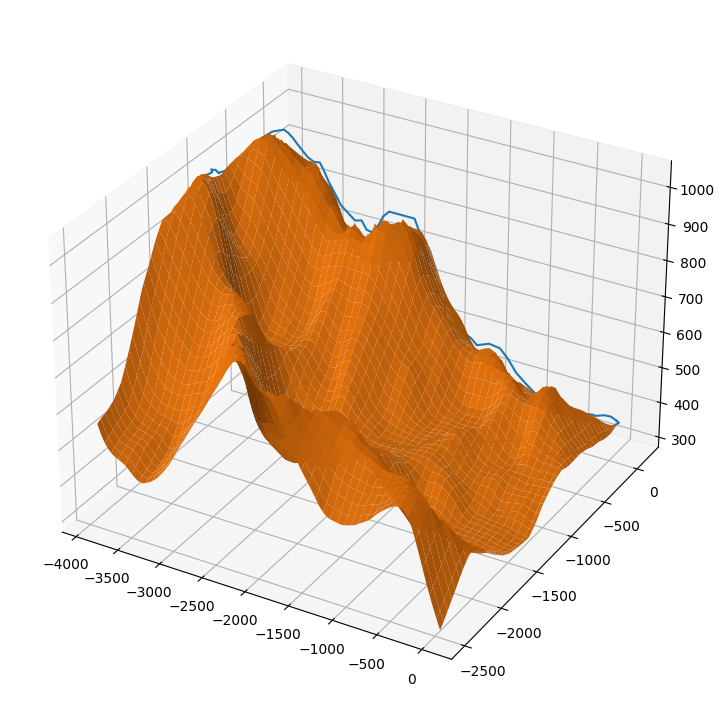

In [21]:
fig = plt.figure(figsize=(16, 9), dpi=100)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot( path_x, path_y, path_z)
ax.plot_surface( surf_x_grid, surf_y_grid, surf_z_grid )
plt.show()

**Find the surface that is bounded by the path**

The surface plotted above contains points that are both inside and outside the loop formed by the path taken.

We only want to evaluate our surface integral for the parts of the surface that are inside the path. We can use the `matplotlib path` module to find these points.

*This code is complete*

In [12]:
# First form a 2D array of coordinates of our path taken
# i.e. path_points[0] returns both coordinates of the first point of the path
path_points = np.stack( (path_x,path_y) , axis=1)

# Make a matplotlib path using these points:
p = path.Path(path_points)

# Similarly, we make a 2D array of our surface coordinates,
# i.e. surf_points[0] returns both coordinates of the first point of the surface
surf_points=np.stack((surf_x,surf_y),axis=1)

# We can now use the matplotlib path "contains_points" function to
# find which of our surface points are inside the path
inside = p.contains_points(surf_points)

# inside[i] is True if surf_points[i] is inside the path
# we reshape this back into our 2D grid:
inside_grid = np.reshape( inside, (N,N) )

**As a check, we plot all the surface points that are inside our path**

*This code is complete*

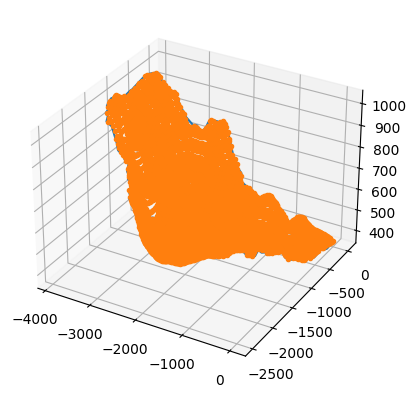

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot( path_x, path_y, path_z )
# Since inside_grid is an array with values: True or False,
# when matplotlib uses this as an array index, as in surf_x_grid[inside_grid],
# only those values of the array where the index is True are returned
ax.plot( surf_x_grid[inside_grid], surf_y_grid[inside_grid], surf_z_grid[inside_grid],'.' )
plt.show()

**Now perform the surface integration**

*This code is **not** complete. You need to finish the calculations of* `Iy`, `Iz` *and* `I`

In [17]:
# First evaluate the surface normal vector (Nx, Ny, Nz)
# Recall that dA = cross(dr/dx,dr/dy)dxdy from Databook
# where r is the position vector of a point on the surface
# dr/dx = [1 0 dz/dx] and dr/dy = [0 1 dz/dy]
# Hence dA = [-dz/dx -dz/dy 1]*dx*dy
dx = np.gradient( surf_x_grid[0,:] ) # calculate small changes in x
dy = np.gradient( surf_y_grid[:,0] ) # calculate small changes in y
[ dzdx, dzdy] = np.gradient( surf_z_grid, surf_x_grid[0,:], surf_y_grid[:,0] ) # calculate partial derivatives of z
Nx = -dzdx *(dx*dy)
Ny = -dzdy *(dx*dy)
Nz = 1*np.outer(dx,dy)

# Evaluate the vector field at all points on the surface:
[Bx, By, Bz] = myfield(surf_x_grid, surf_y_grid, surf_z_grid)

# Finally, evaluate the surface integral ONLY for the surface points
# that are inside our path
Ix = np.sum( Bx[inside_grid] * Nx[inside_grid] )
Iy =  np.sum( By[inside_grid] * Ny[inside_grid] )
Iz =  np.sum( Bz[inside_grid] * Nz[inside_grid] )
I = Ix + Iy + Iz

print ("The result of the surface integral is, ", I)
                         

The result of the surface integral is,  -931355.5463476201
